# chapter 3. Evaluation

## F1 Score / ROC Curve and AUC

### F1 스코어 

**F1 스코어**는 **정밀도와 재현율을 결합한 지표**이다. <br>
F1 스코어는 **정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가진다.** <br>

<img src = 'image/F1 Score.jpg' alt = 'F1 Score' width='700' height='700'>

사이킷런은 **F1 스코어를 구하기 위해 f1_score() API를 제공**한다. 

In [32]:
# 이전 Precision and Recall Data

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import Binarizer

def get_clf_eval(Y_test, pred):
    confusion = confusion_matrix(Y_test, pred)
    accuracy = accuracy_score(Y_test, pred)
    precision = precision_score(Y_test, pred)
    recall = recall_score(Y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy, precision, recall))

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

# Null 처리 함수 
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터 / 테스트 데이터 분할
titanic_df = pd.read_csv(r'/Users/1001l1000/Documents/AI-Tech/Jen/data/titanic_train.csv')
Y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, Y_train, Y_test = train_test_split(X_titanic_df, Y_titanic_df,
                                                    test_size = 0.20, random_state = 11)

lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, Y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(Y_test, pred)

# Binarizer의 threshold 설정값, 분류 결정 임계값
custom_threshold = 0.5

# predict_proba() 반환값의 두 번쨰 column, 즉 Positive 클래스 column 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(Y_test, custom_predict)

# 테스트를 수행할 모든 임계값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(Y_test, pred_proba_c1, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값 : ', custom_threshold)
        get_clf_eval(Y_test, custom_predict)
        
get_eval_by_threshold(Y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705
오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705
임계값 :  0.4
오차 행렬
[[97 21]
 [11 50]]
정확도 : 0.8212, 정밀도 : 0.7042, 재현율 : 0.8197
임계값 :  0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도 : 0.8547, 정밀도 : 0.7869, 재현율 : 0.7869
임계값 :  0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705
임계값 :  0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도 : 0.8715, 정밀도 : 0.8654, 재현율 : 0.7377
임계값 :  0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도 : 0.8771, 정밀도 : 0.8980, 재현율 : 0.7213


In [33]:
from sklearn.metrics import f1_score
f1 = f1_score(Y_test, pred)
print('F1 스코어 : {0:.4f}'.format(f1))

F1 스코어 : 0.7966


In [34]:
def get_clf_eval(Y_test, pred):
    confusion = confusion_matrix(Y_test, pred)
    accuracy = accuracy_score(Y_test, pred)
    precision = precision_score(Y_test, pred)
    recall = recall_score(Y_test, pred)
    
    # F1 스코어 추가
    f1 = f1_score(Y_test, pred)
    print('오차 행렬')
    print(confusion)
    
    # f1 score print 추가
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}'.format(accuracy, precision, recall, f1))
    
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(Y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임계값 :  0.4
오차 행렬
[[97 21]
 [11 50]]
정확도 : 0.8212, 정밀도 : 0.7042, 재현율 : 0.8197, F1 : 0.7576
임계값 :  0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도 : 0.8547, 정밀도 : 0.7869, 재현율 : 0.7869, F1 : 0.7869
임계값 :  0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705, F1 : 0.7966
임계값 :  0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도 : 0.8715, 정밀도 : 0.8654, 재현율 : 0.7377, F1 : 0.7965
임계값 :  0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도 : 0.8771, 정밀도 : 0.8980, 재현율 : 0.7213, F1 : 0.8000


### ROC 곡선과 AUC

**ROC 곡선(Receiver Operation Characteristic Curve)과 이에 기반한 AUC 스코어**는 **이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표**이다. <br>
머신러닝의 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표이기도 하다. <br>
**ROC 곡선**은 **FPR이 변할 떄 TPR이 어떻게 변하는지를 나타내는 곡선**이다. <br>
**FPR을 X축**으로, **TPR을 Y축**으로 잡으면 **FPR의 변화에 따라 TPR의 변화가 곡선 형태**로 나타난다. <br>

**TPR은 True Positive Rate**의 약자이고, **재현율**을 나타낸다. **TPR은 TP / (FN + TP)** 이다. <br>
**재현율은 민감도**로도 불린다. **민감도에 대응하는 지표로 TNR(True Negative Rate)이라고 불리는 특이성(Specificity)** 이 있다. <br>
민감도는 실제값 Positive(양성)가 정확히 예측돼야 하는 수준을 나타낸다. <br>
특이성은 실제값 Negative(음성)가 정확히 예측돼야 하는 수준을 나타낸다. <br>

TNR인 **특이성**은 **TNR = TN / (FP + TN)** <br>
ROC 곡선의 X축 기준인 **FPR**은 **FPR = FP / (FP + TN)** 이므로 **1 - TNR 또는 1 - 특이성**으로 표현된다. <br>

**FPR = FP / (FP + TN) = 1 - TNR = 1 - 특이성** <br>

ROC 곡선이 가운데 **직선에 가까울수록 성능이 떨어지는 것**이며, **멀어질수록 성능이 뛰어난 것**이다. <br>
ROC 곡선은 **FPR을 0부터 1까지 변경하며, TPR의 변화값을 구한다.** <br>
**FPR을 0부터 1까지 변경하기 위해서는 분류 결정 임계값을 변경하면 된다.** <br>
Positive 예측값을 결정하는 확률의 기준이기 때문에 **FPR을 0으로 만들려면 임계값을 1로 지정하면 된다.** <br>
Positive 예측 기준이 매우 높기 때문에 분류기(Classifier)가 임계값보다 높은 확률을 가진 데이터를 Positive로 예측할 수 없기 때문이다. <br>

반대로 **FPR을 1로 만들기 위해서는 TN을 0으로 만들면 된다.** <br>
**TN을 0으로 만들기 위해서는 분류 결정 임계값을 0으로 지정**하면 된다. <br>
Positive 확률 기준이 너무 낮아 Positive로 예측한다. 이렇게 되면 아예 Negative 예측이 없기 때문에 TN은 0이 되고 FPR 값은 1이 된다. <br>
임계값을 1부터 0까지 변화시키면서 FPR을 구하고, FPR 값의 변화에 따른 TPR 값을 구하는 것이 ROC 곡선이다. <br>

사이킷런은 **ROC 곡선을 구하기 위해 roc_curve() API를 제공**한다. 

|입력 파라미터|반환 값|
|:------|:---|
|y_true : 실제 클래스 값 array(array shape = [데이터 건수]) <br> y_score : predict_proba()의 반환값 array에서 Positive column의 예측 확률이 보통 사용된다. array shape = [n_sample]|fpr : fpr 값을 array로 반환 <br> tpr : tpr 값을 array로 반환 <br> thresholds : threshold 값 array|

In [35]:
from sklearn.metrics import roc_curve
import numpy as np

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(Y_test, pred_proba_class1)

# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임계값을 5 step으로 추출
# thresholds[0]은 max(예측 확률) + 1로 임의 설정 된다. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임계값 배열의 index : ', thr_index)
print('샘플 index로 추출한 임계값 : ', np.round(thresholds[thr_index], 2))

# 5 step 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임계값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임계값별 TPR : ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임계값 배열의 index :  [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임계값 :  [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임계값별 FPR :  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임계값별 TPR :  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


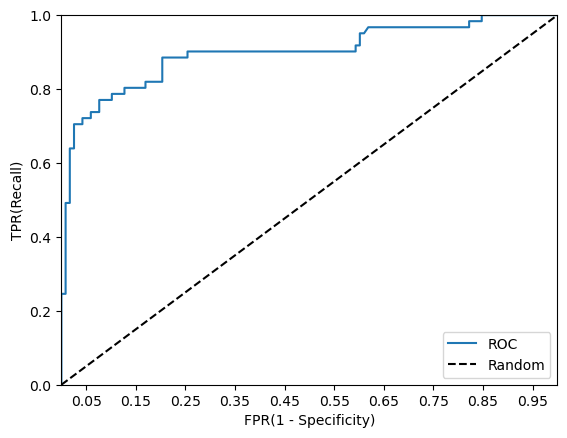

In [39]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def roc_curve_plot(Y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR 값을 반환 받는다. 
    fprs, tprs, thresholds = roc_curve(Y_test, pred_proba_c1)
    
    # ROC 곡선을 그래프 곡선으로 그린다.
    plt.plot(fprs, tprs, label = 'ROC')
    
    # 가운데 대각선 직선을 그린다.
    plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
    
    # FPR X축의 scale을 0.1 단위로 변경, X, Y 축 이름 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Specificity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(Y_test, pred_proba[:, 1])

일반적으로 ROC 곡선 자체는 FPR과 TPR의 변화값을 보는데 이용하며 분류의 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC 값으로 결정한다. <br>
AUC(Area Under Curve) 값은 ROC 곡선 밑의 면적을 구한 것으로 일반적으로 1에 가까울수록 좋은 수치이다. 

In [41]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(Y_test, pred_proba)
print('ROC AUC 값 : {0:.4f}'.format(roc_score))

ROC AUC 값 : 0.8987


In [42]:
def get_clf_eval(Y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(Y_test, pred)
    accuracy = accuracy_score(Y_test, pred)
    precision = precision_score(Y_test, pred)
    recall = recall_score(Y_test, pred)
    f1 = f1_score(Y_test, pred)
    
    # ROC-AUC 추가
    roc_auc = roc_auc_score(Y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    
    # ROC-AUC print 추가
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy, precision, recall, f1, roc_auc))